<a href="https://colab.research.google.com/github/gaberibr/Case-Students_Performance_in_Exams/blob/main/Case_Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data base
Data_Base = pd.read_csv('StudentsPerformance.csv')

#dimension (.shape)
Data_Base.shape

(1000, 8)

In [4]:
#Head
Data_Base.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


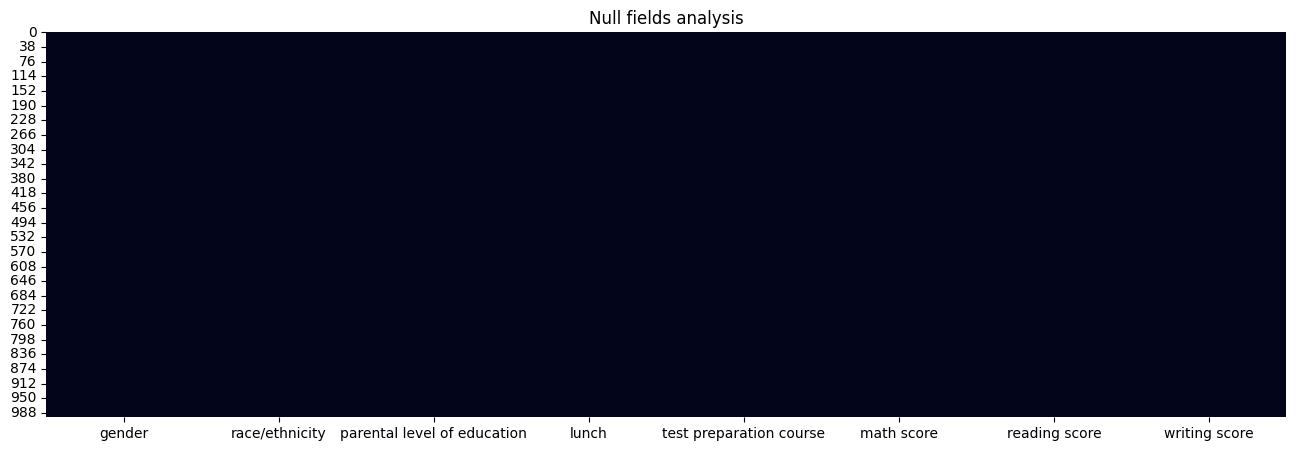

In [18]:
#null fields
Null = Data_Base.isnull()
plt.figure(figsize=(16,5))
plt.title('Null fields analysis')
sns.heatmap(Null, cbar=False);

In [19]:
Null.sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [21]:
#unique
Data_Base.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [22]:
#duplicate data
Data_Base.duplicated().sum()

0

In [23]:
#statistics
Data_Base.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
#info
Data_Base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [29]:
#percent
Data_Base['gender'].value_counts(normalize=True)*100

female    51.8
male      48.2
Name: gender, dtype: float64

*Division between gender.*

In [30]:
Data_Base['race/ethnicity'].value_counts(normalize=True)*100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

*Ethnicities are balanced in parts, except the group A*

In [31]:
Data_Base['parental level of education'].value_counts(normalize=True)*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

*lower frequency of people who have a master's degree*

In [32]:
Data_Base['lunch'].value_counts(normalize=True)*100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

*opting for standard or reduced lunch.*

In [33]:
Data_Base['test preparation course'].value_counts(normalize=True)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

*Only 64% did not take a preparatory test before taking the test.*

<Axes: xlabel='math score', ylabel='gender'>

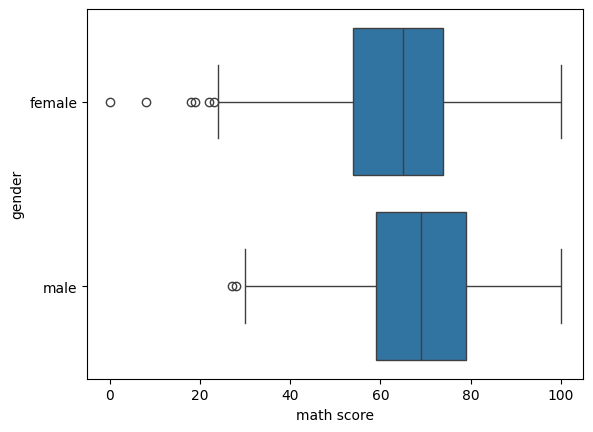

In [34]:
sns.boxplot(data=Data_Base, x='math score', y='gender')

<Axes: xlabel='reading score', ylabel='gender'>

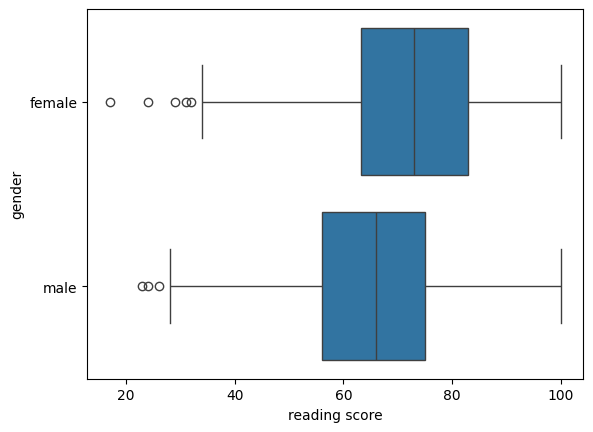

In [35]:
sns.boxplot(data=Data_Base, x='reading score', y='gender')

<Axes: xlabel='writing score', ylabel='gender'>

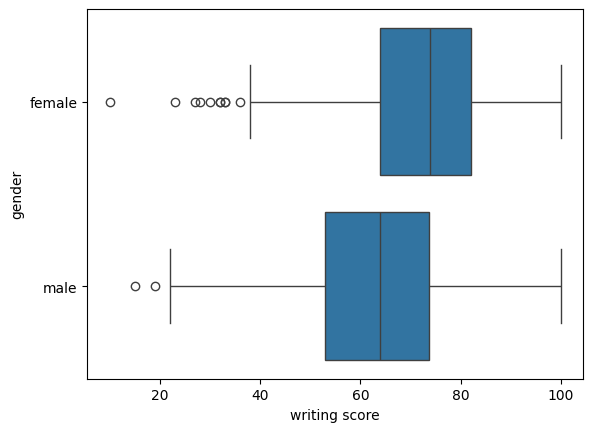

In [36]:
sns.boxplot(data=Data_Base, x='writing score', y='gender')

In [38]:
Data_Base.groupby(by=['gender']).describe()

math score                                                       \
            count       mean        std   min   25%   50%   75%    max   
gender                                                                   
female      518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0   
male        482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0   

       reading score             ...              writing score             \
               count       mean  ...   75%    max         count       mean   
gender                           ...                                         
female         518.0  72.608108  ...  83.0  100.0         518.0  72.467181   
male           482.0  65.473029  ...  75.0  100.0         482.0  63.311203   

                                                   
              std   min   25%   50%    75%    max  
gender                                             
female  14.844842  10.0  64.0  74.0  82.00  100.0  
male    14.113832  15.0  53.0  64.0  73.75  100.0  

[2 rows x 24 columns]

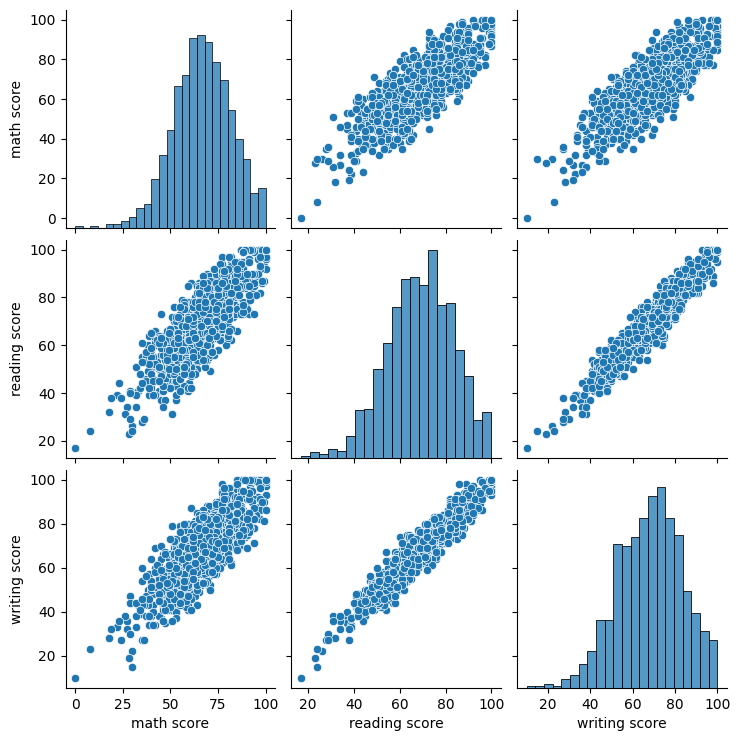

In [39]:
sns.pairplot(Data_Base)

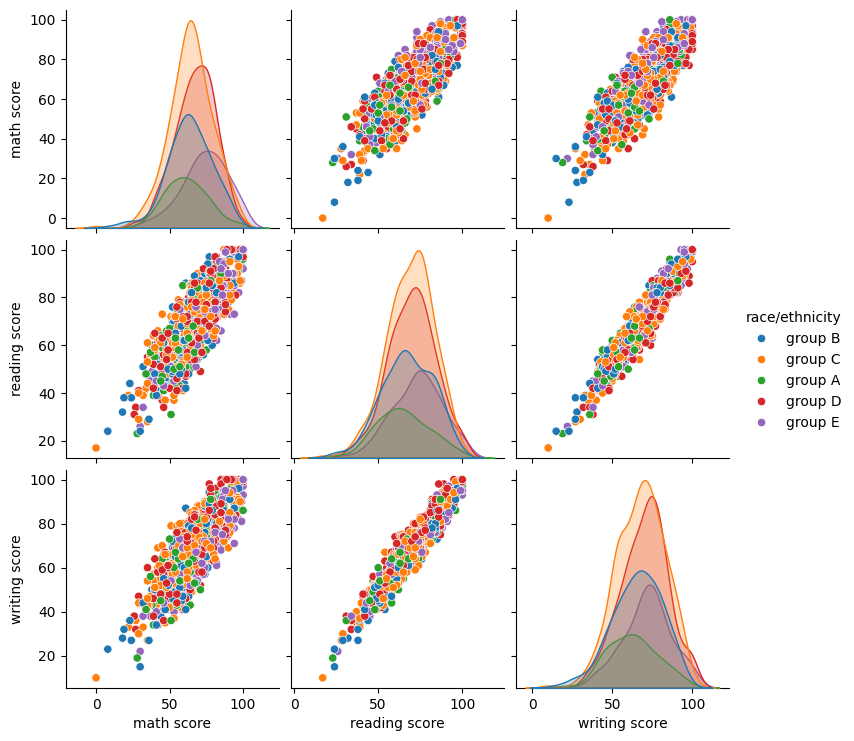

In [40]:
sns.pairplot(Data_Base, hue='race/ethnicity')

<Axes: xlabel='math score', ylabel='race/ethnicity'>

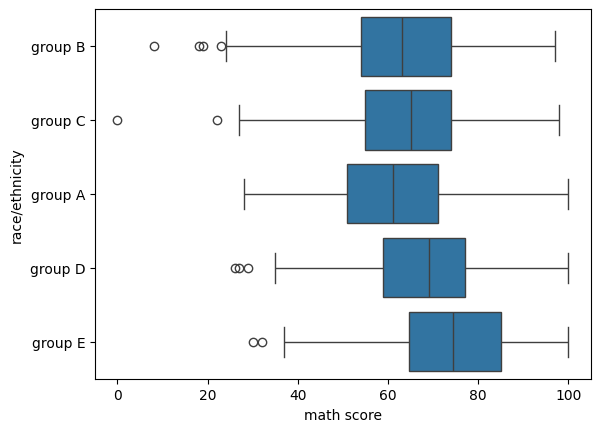

In [41]:
sns.boxplot(Data_Base, x='math score', y='race/ethnicity')

<Axes: xlabel='math score', ylabel='parental level of education'>

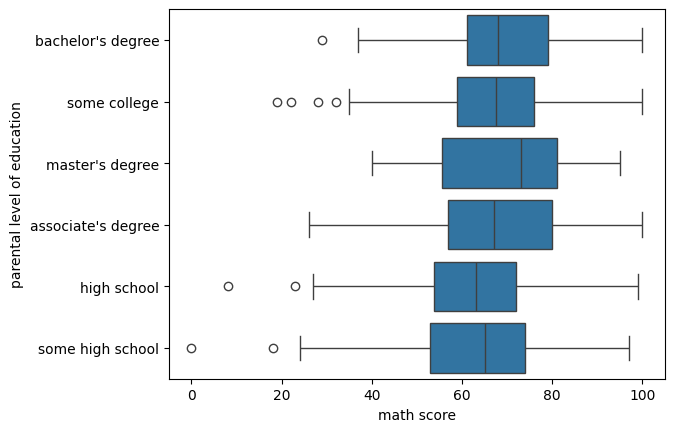

In [42]:
sns.boxplot(Data_Base, x='math score', y='parental level of education')

In [43]:
Data_Base.groupby(by=['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


<Axes: xlabel='math score', ylabel='test preparation course'>

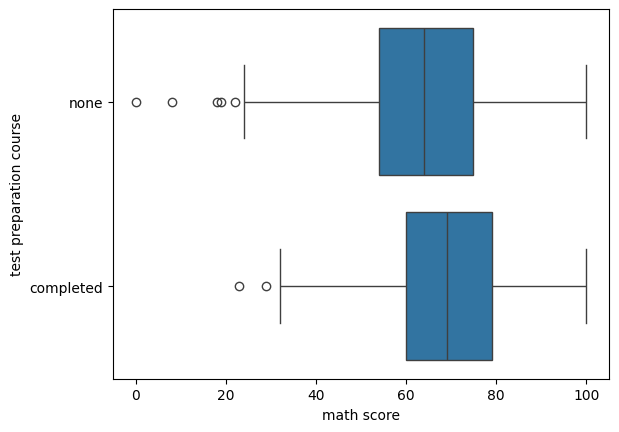

In [44]:
sns.boxplot(Data_Base, x='math score', y='test preparation course')

In [45]:
Data_Base.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


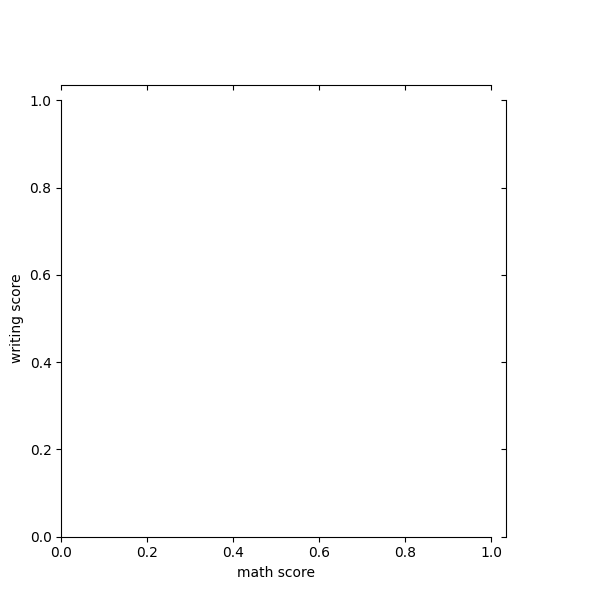

In [46]:
sns.JointGrid(Data_Base, x='math score', y='writing score')

<Axes: xlabel='math score', ylabel='writing score'>

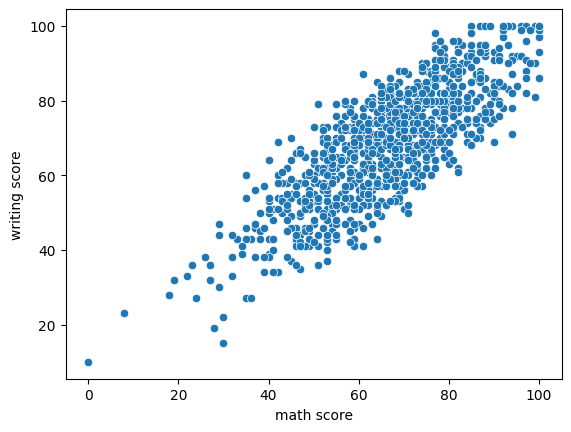

In [47]:
sns.scatterplot(Data_Base, x='math score', y='writing score')